# Прогнозирование. БИ20-4 Чайковская, Петрова, Мытарева, Крылов, Иванова, Киракосян

Рассмотрим конкретный кейс из жизни: Алиса собирается поехать в Москву. Для этого ей нужно заранее знать, какая погода будет с 26 по 30 апреля, чтобы решить, какие вещи ей нужно взять с собой в поездку. Имеются данные по средней температуре воздуха в Москве с 26 по 30 апреля с 2012 по 2021. Необходимо построить прогноз температуры на 2022 год.

Если предположительная температура воздуха меньше 5 °C, Алисе нужно взять с собой в Москву теплую куртку, шапку, шерстяной свитер, джинсы, шарф и ботинки.
Если предположительная температура воздуха в диапазоне [5-12] °C, Алисе нужно взять с собой в Москву пальто, свитшот, тонкий свитер, брюки, кроссовки.
Если предположительная температура воздуха больше 12 °С, Алисе нужно взять с собой в Москву тренч, футболку, рубашку, юбку, туфли и кеды.

## Задание 1

## Чтение из csv файла

Год, xi =  [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Температура, °C, yi =  [3, 3, 6, 8, 11, 8, 9, 11, 10, 12]


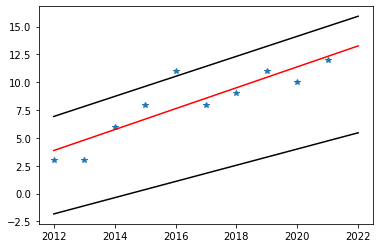

In [1]:
#Линейная регрессия

#2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 - год, xi
#3 3 6 8 11 8 9 11 10 12 - температура, °C, yi

import numpy as np
import statistics


#чтение из csv файла
i = 0
import csv
with open("prognoz.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        i = i+1
        if i ==  1:
            year = list(map(int,row[0].split(';')))
            print('Год, xi = ', year)
        if i == 2:
            temperature = list(map(int,row[0].split(';')))
            print('Температура, °C, yi = ', temperature)
q = np.array(year)
qq = np.array(temperature)

#Расчёт доверительных интервалов 

y_1 = list(temperature)
for i in range(len(y_1)):
    y_1[i]-=(1.5*statistics.stdev(y_1))
    
y_2 = list(temperature)
for i in range(len(y_2)):
    y_2[i]+=(1.5*statistics.stdev(y_1))

#построение графика

z = np.polyfit(q, qq, 1)
p = np.poly1d(z)

import matplotlib.pyplot as plt
xp = np.linspace(2012, 2022, 100)
plt.plot(q, qq, '*', xp, p(xp), 'red', [2012, 2022], [y_1[0], y_1[9]], 'k', [2012, 2022], [y_2[0], y_2[9]], 'k')
plt.show()

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

#чтение из csv файла
i = 0
import csv
with open("prognoz.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        i = i+1
        if i ==  1:
            year = list(map(int,row[0].split(';')))
            print('Год, xi = ', year)
        if i == 2:
            temperature = list(map(int,row[0].split(';')))
            print('Температура, °C, yi = ', temperature)
x = np.array(year).reshape((-1, 1))
y = np.array(temperature)

model = LinearRegression() 
#оператор создает переменную модель как экземпляр

model.fit(x, y)
model = LinearRegression().fit(x, y) 

#С помощью .fit() вычисляем оптимальные значения весов b_0b и b_1b 
#Атрибуты модели: .intercept_, который представляет коэффициент, и .coef_, который представляет b_1b 
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
#Значение b_0 = -1886 (приблизительно) показывает, что модель предсказывает реакцию -1886, когда xx равно нулю
print('slope:', model.coef_)

y_pred = model.predict(x)
#Значение b_1 = 0.939 означает, что прогнозируемый ответ увеличивается на 0.939, когда xx увеличивается на единицу

#Чтобы получить прогнозируемый ответ, используем .predict():
print('predicted response:', y_pred, sep='\n')

x_new = np.arange(2023).reshape((-1, 1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

print('Предположительная температура воздуха в Москве с 26 по 30 апреля в 2022 году составит: ',y_new[2022])

if y_new[2022] < 5:
    print('Алисе нужно взять с собой в Москву теплую куртку, шапку, шерстяной свитер, джинсы, шарф и ботинки')
elif 5 <= y_new[2022] <= 12:
    print('Алисе нужно взять с собой в Москву пальто, свитшот, тонкий свитер, брюки, кроссовки')
else:
    print('Алисе нужно взять с собой в Москву тренч, футболку, рубашку, юбку, туфли и кеды')

Год, xi =  [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Температура, °C, yi =  [3, 3, 6, 8, 11, 8, 9, 11, 10, 12]
coefficient of determination: 0.7836709397527433
intercept: -1886.1878787878784
slope: [0.93939394]
predicted response:
[ 3.87272727  4.81212121  5.75151515  6.69090909  7.63030303  8.56969697
  9.50909091 10.44848485 11.38787879 12.32727273]
[[   0]
 [   1]
 [   2]
 ...
 [2020]
 [2021]
 [2022]]
[-1886.18787879 -1885.24848485 -1884.30909091 ...    11.38787879
    12.32727273    13.26666667]
Предположительная температура воздуха в Москве с 26 по 30 апреля в 2022 году составит:  13.266666666666424
Алисе нужно взять с собой в Москву тренч, футболку, рубашку, юбку, туфли и кеды


## Ввод значений с клавиатуры

2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
3 3 6 8 11 8 9 11 10 12


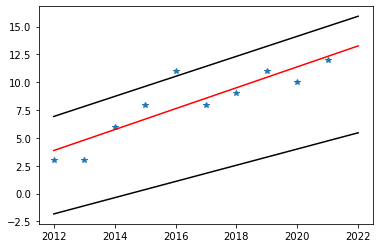

In [3]:
import numpy as np
import statistics

year = list(map(int,input().split()))
#скопируйте значения ниже
#2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
temperature = list(map(int,input().split()))
#скопируйте значения ниже
#3 3 6 8 11 8 9 11 10 12

x = np.array(year)
y = np.array(temperature)

#Расчёт доверительных интервалов 

y_1 = list(temperature)
for i in range(len(y_1)):
    y_1[i]-=(1.5*statistics.stdev(y_1))
    
y_2 = list(temperature)
for i in range(len(y_2)):
    y_2[i]+=(1.5*statistics.stdev(y_1))
#построение графика

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

import matplotlib.pyplot as plt
xp = np.linspace(2012, 2022, 100)
plt.plot(x, y, '*', xp, p(xp), 'red', [2012, 2022], [y_1[0], y_1[9]], 'k', [2012, 2022], [y_2[0], y_2[9]], 'k')
plt.show()

In [4]:
#Ввод значений с клавиатуры

import numpy as np

from sklearn.linear_model import LinearRegression

year = list(map(int,input().split()))
#скопируйте значения ниже
#2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
temperature = list(map(int,input().split()))
#скопируйте значения ниже
#3 3 6 8 11 8 9 11 10 12

x = np.array(year).reshape((-1, 1))
y = np.array(temperature)

model = LinearRegression() 
#оператор создает переменную модель как экземпляр

model.fit(x, y)
model = LinearRegression().fit(x, y) 
#С помощью .fit() вычисляем оптимальные значения весов b_0b и b_1b 

#Атрибуты модели: .intercept_, который представляет коэффициент, и .coef_, который представляет b_1b 
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
#Значение b_0 = -1886 (приблизительно) показывает, что модель предсказывает реакцию -1886, когда xx равно нулю

print('slope:', model.coef_)
y_pred = model.predict(x)
#Значение b_1 = 0.939 означает, что прогнозируемый ответ увеличивается на 0.939, когда xx увеличивается на единицу

#Чтобы получить прогнозируемый ответ, используем .predict():
print('predicted response:', y_pred, sep='\n')

x_new = np.arange(2023).reshape((-1, 1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

print('Предположительная температура воздуха в Москве с 26 по 30 апреля в 2022 году составит: ',y_new[2022])

if y_new[2022] < 5:
    print('Алисе нужно взять с собой в Москву теплую куртку, шапку, шерстяной свитер, джинсы, шарф и ботинки')
elif 5 <= y_new[2022] <= 12:
    print('Алисе нужно взять с собой в Москву пальто, свитшот, тонкий свитер, брюки, кроссовки')
else:
    print('Алисе нужно взять с собой в Москву тренч, футболку, рубашку, юбку, туфли и кеды')

2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
3 3 6 8 11 8 9 11 10 12
coefficient of determination: 0.7836709397527433
intercept: -1886.1878787878784
slope: [0.93939394]
predicted response:
[ 3.87272727  4.81212121  5.75151515  6.69090909  7.63030303  8.56969697
  9.50909091 10.44848485 11.38787879 12.32727273]
[[   0]
 [   1]
 [   2]
 ...
 [2020]
 [2021]
 [2022]]
[-1886.18787879 -1885.24848485 -1884.30909091 ...    11.38787879
    12.32727273    13.26666667]
Предположительная температура воздуха в Москве с 26 по 30 апреля в 2022 году составит:  13.266666666666424
Алисе нужно взять с собой в Москву тренч, футболку, рубашку, юбку, туфли и кеды


## Задание 2

In [5]:
def Metod_Gaussa(arr, brr):
    for k in range(arr.shape[0] - 1):
        #поиск строки с максимальным элементом
        max_elem = 0
        str = 0
        for i in range (k, arr.shape[0]):
            if abs(arr[i,k]) > abs(max_elem):
                max_elem = arr[i,k]
                str = i
        #меняем местами строки квадратной матрицы
        change = numpy.repeat(arr[k], 1)
        arr[k], arr[str] = arr[str], change
        #меняем местами элементы вектора-столбца
        change = numpy.repeat(brr[k], 1)
        brr[k], brr[str] = brr[str], change
        #делим полученную строку на max_elem
        arr[k] = arr[k] / max_elem
        brr[k] = brr[k] / max_elem
        #домножаем строку на коэффициенты и вычитаем ее из остальных строк
        for i in range (k + 1, arr.shape[0]):
            factor = arr[i,k]
            arr[i] = arr[i] - arr[k] * factor
            brr[i] = brr[i] - brr[k] * factor

    #находим неизвестные
    arg = [brr[brr.shape[0] - 1] / (arr[arr.shape[0] - 1, arr.shape[0] - 1])]
    for i in range(arr.shape[0] - 2, -1, -1):
        n = brr[i]
        for j in range(len(arg)):
            n = n - arg[j] * arr[i, arr.shape[0] - 1 - j]
        arg.append(n)

    #переворачиваем значения в списке
    otv = []
    for i in reversed(arg): otv.append(i)
    return otv

Задание 2.а
Массив точек
[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] [3, 3, 6, 8, 11, 8, 9, 11, 10, 12] [2.60000153031433, 2.77130119962385, 2.94084780325647, 3.10864134121221, 3.27468181337463, 3.43896921986016, 3.60150356066879, 3.76228483574232, 3.92131304513896, 4.07858818885870, 4.23411026690155, 4.38787927903468, 4.53989522566553, 4.69015810650308, 4.83866792172194, 4.98542467120569, 5.13042835501255, 5.27367897302611, 5.41517652542097, 5.55492101202253, 5.69291243300540, 5.82915078831138, 5.96363607788226, 6.09636830177624, 6.22734745981870, 6.35657355224248, 6.48404657904757, 6.60976654011756, 6.73373343545245, 6.85594726505224, 6.97640802897513, 7.09511572722113, 7.21207035979023, 7.32727192662423, 7.44072042778134, 7.55241586314514, 7.66235823283205, 7.77054753690027, 7.87698377523338, 7.98166694788961, 8.08459705486894, 8.18577409605496, 8.28519807150587, 8.38286898133811, 8.47878682543524, 8.57295160385547, 8.66536331654061, 8.75602196360705, 8.844927544938

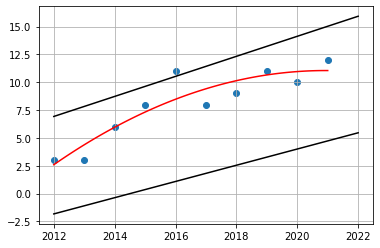

Задание 2.б
2012.0 2.60000153031433 2012.090909090909 2.77130119962385 2012.1818181818182 2.94084780325647


In [7]:
#импорт библиотек для работы
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import statistics

import numpy

x = symbols('x')
K = 3 #степень многочлена

#опорные точки
xi = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
yi = [3, 3, 6, 8, 11, 8, 9, 11, 10, 12]

def approksim(xi, yi, K):
    #поиск констант
    A = numpy.zeros([K + 1, K + 1])
    for i in range(K + 1):
        for j in range(K + 1):
            for t in xi: A[i, j] += t ** (2 * K - i - j)
    a = numpy.zeros([K + 1])
    for i in range(K + 1):
        for j in range(len(xi)): a[i] += yi[j] * xi[j] ** (K - i)
    const = []
    for j in Metod_Gaussa(A, a): const.append(float(j))
    #составление уравнения
    f = 0
    for i in range(len(const)):
        f += const[i] * x ** (len(const) - 1 - i)
    return f

#значения квадратичной функции, полученной МНК, в тех же точках
f2 = []
for i in xi: f2.append(approksim(xi, yi, 2).evalf(subs={'x': i}))
#отклонения (невязки в точках)
e2 = []
for i in range(len(xi)): e2.append(abs(f2[i] - yi[i]))

xfi = numpy.linspace(xi[0], xi[len(xi) - 1], 100)

f2i = [approksim(xi, yi, 2).subs(x, a) for a in xfi]
#2.a
print('Задание 2.а')
print('Массив точек')
print(xi, yi, f2i)

#опорные точки
xi = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
yi = [3, 3, 6, 8, 11, 8, 9, 11, 10, 12]

y_1 = list(yi)
for i in range(len(y_1)):
    y_1[i]-=(1.5*statistics.stdev(y_1))
print(y_1)
    
y_2 = list(yi)
for i in range(len(y_2)):
    y_2[i]+=(1.5*statistics.stdev(y_1))

plt.plot(xfi, f2i, 'r', [2012, 2022], [y_1[0], y_1[9]], 'k', [2012, 2022], [y_2[0], y_2[9]], 'k')
plt.scatter(x=xi, y=yi)

plt.grid()
plt.show()

#2.b

print('Задание 2.б')
def calc_parabola_vertex(x1, y1, x2, y2, x3, y3):
    '''
    Adapted and modifed to get the unknowns for defining a parabola:
    http://stackoverflow.com/questions/717762/how-to-calculate-the-vertex-of-a-parabola-given-three-points
    '''

    denom = (x1-x2) * (x1-x3) * (x2-x3);
    A     = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom;
    B     = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom;
    C     = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom;
    print(x1, y1, x2, y2, x3, y3)
    return A,B,C

kfs = calc_parabola_vertex(xfi[0], f2i[0],xfi[1], f2i[1],xfi[2], f2i[2])

print(f"y = {kfs[0]}*x^2 + ({kfs[1]}*x) + ({kfs[2]})")

# 2.б


# Делаем единый массив из точек

arr = [[x,y] for x,y in zip(xi, yi)]

# 2.в
print(f"Дисперсия: {np.asarray(arr).var()}")